# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Executing get requests for btc and format to json
btc_response = requests.get(btc_url).json()

# Executing get requests for eth and format to json
eth_response = requests.get(eth_url).json()

In [7]:
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18833956,
            "total_supply": 18833956,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 47980.0,
                    "volume_24h": 25245706680,
                    "market_cap": 902747912869,
                    "percentage_change_1h": -0.545180963521876,
                    "percentage_change_24h": 1.17408261097147,
                    "percentage_change_7d": 10.7133145388435,
                    "percent_change_1h": -0.545180963521876,
                    "percent_change_24h": 1.17408261097147,
                    "percent_change_7d": 10.7133145388435
                },
                "CAD": {
                    "price": 60670.71,
                    "volume_24h": 31923196096.86,
                    "mark

In [8]:
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117783094,
            "total_supply": 117783094,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3378.25,
                    "volume_24h": 17504307221,
                    "market_cap": 397419709212,
                    "percentage_change_1h": -1.31332518386285,
                    "percentage_change_24h": -0.0910922682417081,
                    "percentage_change_7d": 10.2808007037619,
                    "percent_change_1h": -1.31332518386285,
                    "percent_change_24h": -0.0910922682417081,
                    "percent_change_7d": 10.2808007037619
                },
                "CAD": {
                    "price": 4271.797125,
                    "volume_24h": 22134196480.9545,
             

In [9]:
# Fetch current BTC price
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57576.00
The current value of your 5.3 ETH is $17904.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Verify keys and secret key
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [13]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-29", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
current_closing_price = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Preview DataFrame
current_closing_price.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-09-29 00:00:00-04:00  114.97  115.06  114.715  114.85  5099586  435.19   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-29 00:00:00-04:00  437.04  433.85  434.44  69828191

In [14]:
# Pick AGG and SPY close prices
agg_close_price = float(current_closing_price["AGG"]["close"])
spy_close_price = float(current_closing_price["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.85
Current SPY closing price: $434.44


In [15]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21722.00
The current value of your 200 AGG shares is $22970.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

In [17]:
# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_investments = my_agg_value + my_spy_value
consolidate_assets = total_crypto + total_investments

print(f"The consolidated financial asset is worth ${consolidate_assets:0.2f}")

The consolidated financial asset is worth $120172.73


In [18]:
# Create savings DataFrame
data = [total_crypto, total_investments]

df_savings = pd.DataFrame(data, index =["crypto", "shares"],columns =["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,75480.725
shares,44692.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

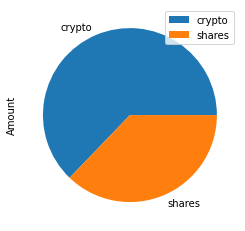

In [19]:
# Plot savings pie chart

df_savings.plot(kind="pie", subplots=True)

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income  * 3
print(f"The total amount in the emergency fund is ${emergency_fund:0.2f}")

# Calculate total amount of savings
print(f"The total amount of savings is ${consolidate_assets:0.2f}")

The total amount in the emergency fund is $36000.00
The total amount of savings is $120172.73


In [21]:
# Validate saving health
if consolidate_assets > emergency_fund:
   print("Congrats! You have a gracious amount of money in your emergency fund. You are on your way to becoming the next Bruce Wayne")
elif consolidate_assets == emergency_fund:
   print("Congrats! You reached your financial goal, yay!")
else:
   print(f"You are ${emergency_fund - consolidate_assets} dollars away from reaching your goal. Keep eating those ramen noodles. nom nom nom")


Congrats! You have a gracious amount of money in your emergency fund. You are on your way to becoming the next Bruce Wayne


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-03', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0     NaN   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0  254.66   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0  255.14   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0  255.21   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0  255.24   

                                                                
                             high      low   close      volume  
time                                                            
2017-10-11 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-10-12 00:00:00-04:00  255.06  254.365  254.60  32195167.0  
2017-10-13 00:00:00-04:00  255.27  254.640  254.91  33563533.0  
2017-10-16 00:00:00-04:00  255.51  254.820  255.30  25720677.0  
2017-10-17 00:00:00-04:00  255.52  254.980  255.46  23608473.0

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)
#use the Alpaca API to fetch five years historical closing prices 
#for a traditional `40/60` portfolio using the `SPY` and `AGG` 
# tickers to represent the `60%` stocks (`SPY`) and `40%` bonds (`AGG`) 
# composition of the portfolio. Make sure to convert the API output 
# to a DataFrame and preview the output.

In [25]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-11 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-10-12 00:00:00-04:00     0.001279  254.66  255.06  254.365  254.60   
2017-10-13 00:00:00-04:00     0.002190  255.14  255.27  254.640  254.91   
2017-10-16 00:00:00-04:00    -0.001001  255.21  255.51  254.820  255.30   
2017-10-17 00:00:00-04:00    -0.000364  255.24  255.52  254.980  255.46   

                                                    
                               volume daily_return  
time                                                
2017-10-11 00:00:00-04:00         NaN          NaN  
2017-10-12 00:00:00-04:00  32195167.0          NaN  
2017-10-13 00:00:00-04:00  33563533.0     0.001218  
2017-10-16 00:00:00-04:00  25720677.0     0.001530  
2017-10-17 00:00:00-04:00  23608473.0     0.000627

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/APIs_Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998506,0.993375,1.003956,1.007465,0.999280,1.009964,1.030645,0.993404,0.999630,1.007014,...,0.996035,0.996603,1.008390,1.003824,1.003423,1.004598,0.989782,0.999859,1.011452,0.987378
2,1.000982,0.990838,0.992582,1.007066,1.011589,0.998611,1.028880,0.985861,1.005425,1.013150,...,0.988134,0.973765,1.012476,1.003816,0.997363,0.998041,0.983240,0.993552,1.010872,0.989300
3,0.985105,0.991781,0.983919,0.984834,1.015999,1.004919,1.030161,0.994688,0.998714,1.017318,...,0.994348,0.974092,1.009579,1.000994,0.988240,0.993239,0.986993,0.988368,1.021037,0.978945
4,0.996881,0.982414,0.983506,0.972970,1.021754,0.999157,1.016108,0.997395,0.994221,1.024548,...,1.007859,0.968022,1.028805,0.999231,0.996322,0.999398,0.981561,0.984814,1.027006,0.986134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.879957,14.484125,10.137967,8.591810,19.945994,11.920262,65.964944,10.569552,27.650287,5.541099,...,17.088773,27.404168,10.899797,13.160536,30.987176,16.672178,5.714168,18.896748,40.953051,9.590398
7557,4.891506,14.540741,10.204173,8.664820,20.164091,11.821449,65.711407,10.507619,27.326155,5.508120,...,17.131403,27.445070,10.776252,12.952718,31.357190,16.683483,5.743372,18.973201,41.219479,9.664298
7558,4.884269,14.529043,10.194864,8.660407,20.122034,11.807852,66.654368,10.398022,27.162211,5.478497,...,17.320927,27.318712,10.564408,12.870387,31.224996,16.404651,5.780475,18.882122,40.993605,9.509683
7559,4.895413,14.275264,10.244712,8.562457,20.196581,11.747284,65.973479,10.515432,27.157269,5.462234,...,17.261769,27.574169,10.661867,12.755425,31.353190,16.557509,5.782980,18.737402,40.937942,9.536593


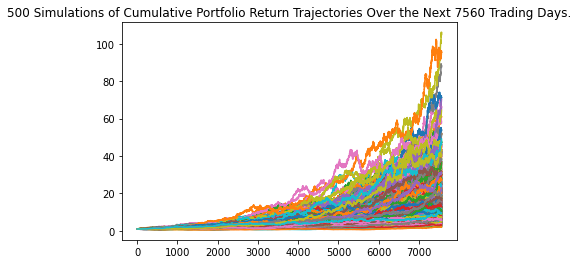

In [27]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()


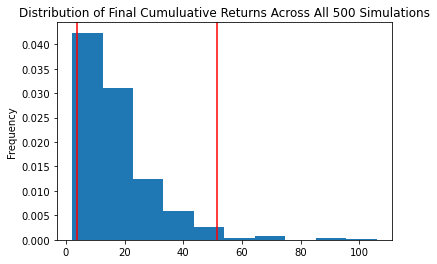

In [28]:
# Plot probability distribution and confidence intervals
distribution_confidence_intervals_plot = MC_thirty_year.plot_distribution()


### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             17.725326
std              13.494950
min               2.083874
25%               9.003841
50%              14.071321
75%              22.306733
max             105.938171
95% CI Lower      3.728762
95% CI Upper     51.414633
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $74575.24 and $1028292.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment_with_50_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
increase50_ci_lower = round(summary_statistics[8]*initial_investment_with_50_increase,2)
increase50_ci_upper = round(summary_statistics[9]*initial_investment_with_50_increase,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${round(initial_investment_with_50_increase)} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${increase50_ci_lower} and ${increase50_ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $111862.86 and $1542438.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/APIs_Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016591,0.998323,0.995687,0.998452,1.002214,0.999455,0.995748,0.994426,1.002317,1.004325,...,1.003086,1.005726,0.998443,1.012248,1.008329,0.994317,0.996022,1.011794,0.995655,0.996570
2,1.010720,0.988354,1.001336,0.995235,0.994037,0.998504,0.993983,1.009197,0.996863,1.001024,...,1.009978,1.010895,0.994442,1.015590,1.008212,0.985517,0.988418,1.022083,0.994591,1.006937
3,1.009866,0.996292,1.007707,1.000412,0.979288,0.985822,0.984863,1.004620,1.001501,1.006276,...,1.005999,0.992342,0.979566,1.013770,1.012417,0.981519,0.993924,1.019261,0.993719,0.998297
4,1.013006,0.990492,1.008325,1.002808,0.984758,1.002544,0.986549,0.996732,0.994278,1.017276,...,1.004753,0.996624,0.982372,1.002303,1.011732,0.981344,0.993391,1.013834,0.988013,0.990361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.338593,1.934270,1.442049,0.650114,1.471325,0.917286,2.408199,1.294581,1.315302,1.407931,...,2.131637,1.305526,1.456006,1.657291,2.089738,1.078584,1.796791,1.925362,1.747495,0.813455
1257,1.335363,1.928343,1.441914,0.652698,1.490562,0.908428,2.413266,1.275804,1.317097,1.423619,...,2.136292,1.304091,1.444286,1.663023,2.120421,1.075629,1.787323,1.906809,1.737303,0.820421
1258,1.341086,1.938552,1.433676,0.648880,1.490350,0.907453,2.430363,1.279701,1.296308,1.424744,...,2.170066,1.310727,1.467481,1.657942,2.093250,1.083463,1.788973,1.894066,1.733380,0.811037
1259,1.339098,1.934161,1.446777,0.648775,1.496542,0.909891,2.455930,1.256147,1.286944,1.416000,...,2.180716,1.328226,1.458377,1.647893,2.082782,1.097551,1.788815,1.863750,1.726195,0.797373


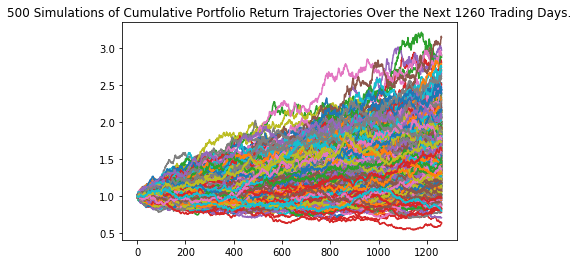

In [34]:
# Plot simulation outcomes
new_line_plot = MC_five_year.plot_simulation()

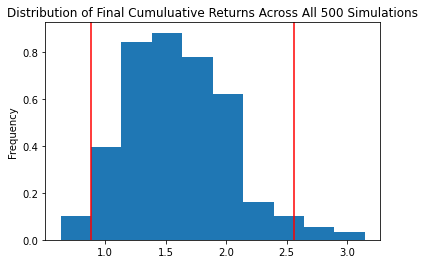

In [35]:
# Plot probability distribution and confidence intervals
new_distribution_confidence_intervals_plot = MC_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5year)

count           500.000000
mean              1.596096
std               0.425022
min               0.629430
25%               1.295449
50%               1.563219
75%               1.869517
max               3.147362
95% CI Lower      0.879705
95% CI Upper      2.564424
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment_retirement = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
retire_in_5_ci_lower = round(summary_statistics_5year[8]*initial_investment_retirement,2)
retire_in_5_ci_upper = round(summary_statistics_5year[9]*initial_investment_retirement,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_retirement} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${retire_in_5_ci_lower} and ${retire_in_5_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17594.11 and $51288.47


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/moniqueferguson/Desktop/Miami/FinTech/MiamiHomework/APIs_Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006657,1.009747,1.009531,1.003701,1.014693,1.006900,0.998362,0.990516,0.990274,1.001213,...,0.995865,0.999847,0.998175,0.999791,0.995290,0.995341,0.997844,0.997336,1.010887,0.997723
2,1.003597,1.003888,1.014006,0.995204,1.027325,1.013445,0.998185,0.985261,0.997500,1.001707,...,0.998109,1.006461,0.981559,0.987555,0.991347,0.995299,1.019365,0.983375,1.028660,1.018372
3,0.993919,0.985132,0.995604,0.980756,1.026577,1.018370,1.004586,0.979942,0.989855,1.000295,...,0.999191,1.024249,0.981702,0.989350,0.992547,0.986442,1.022425,0.978137,1.036885,1.021493
4,0.996496,0.980137,0.996028,0.994161,1.026850,1.038095,1.017248,0.963133,0.989282,0.999153,...,0.993356,1.022763,0.974703,0.993853,0.993610,0.983080,1.021569,0.979272,1.029008,1.022394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.380424,0.817802,2.092490,1.630447,1.594142,1.993962,1.738797,3.626763,1.491623,1.665981,...,2.342568,2.210354,2.590601,1.684684,3.015175,2.790588,4.303285,2.774808,2.337892,1.930779
2517,2.354317,0.800832,2.094458,1.634627,1.588504,1.984392,1.754606,3.679075,1.499311,1.667885,...,2.333991,2.207488,2.592739,1.714724,3.006518,2.807640,4.220816,2.761657,2.324218,1.953893
2518,2.349641,0.798797,2.112066,1.640407,1.564481,1.982953,1.748351,3.670644,1.505255,1.672259,...,2.367259,2.194706,2.631488,1.716908,2.989143,2.844030,4.252391,2.772716,2.341053,1.970897
2519,2.338538,0.804913,2.085968,1.636086,1.573240,1.950145,1.729706,3.735321,1.501592,1.677682,...,2.376174,2.166167,2.637960,1.724326,3.012947,2.829941,4.308691,2.796622,2.333259,1.986940


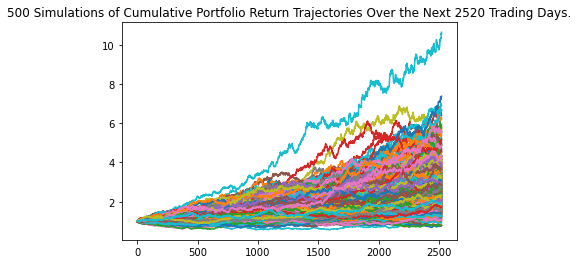

In [40]:
# Plot simulation outcomes
new_ten_year_plot = MC_ten_year.plot_simulation()

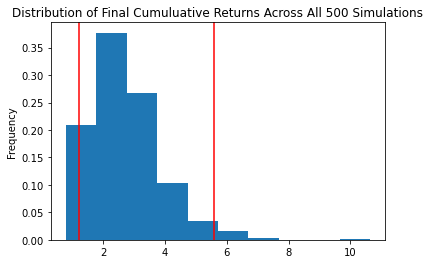

In [41]:
# Plot probability distribution and confidence intervals
ten_year_distribution_confidence_intervals_plot = MC_ten_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_ten_year)

count           500.000000
mean              2.729972
std               1.151590
min               0.781171
25%               1.913265
50%               2.543003
75%               3.308347
max              10.644076
95% CI Lower      1.213540
95% CI Upper      5.582699
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment_retirement_ten_year = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
retire_in_10_ci_lower = round(summary_statistics_ten_year[8]*initial_investment_retirement_ten_year,2)
retire_in_10_ci_upper = round(summary_statistics_ten_year[9]*initial_investment_retirement_ten_year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_retirement_ten_year} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${retire_in_10_ci_lower} and ${retire_in_10_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72812.41 and $334961.94


In [50]:
# Conclusion of initial investment
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

# Conclusion of investment * 1.5
print(f"There is a 95% chance that an initial investment of ${round(initial_investment_with_50_increase)} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${increase50_ci_lower} and ${increase50_ci_upper}")

# Conclusion of Retire in 5 years
print(f"There is a 95% chance that an initial investment of ${initial_investment_retirement} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${retire_in_5_ci_lower} and ${retire_in_5_ci_upper}")

# Conclusion of Retire in 10 years
print(f"There is a 95% chance that an initial investment of ${initial_investment_retirement_ten_year} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${retire_in_10_ci_lower} and ${retire_in_10_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $74575.24 and $1028292.66
There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within the range of $111862.86 and $1542438.99
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within the range of $17594.11 and $51288.47
There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within the range of $72812.41 and $334961.94
